# Create graphs for employee data



In [99]:
import pandas as pd
import os
import psycopg2
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [100]:

DB_HOST = os.getenv('DB_HOST')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
load_dotenv()


True

In [101]:
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:5432/company')
dbConnection = engine.connect()

In [102]:

# Read data from PostgreSQL database table and load into a DataFrame instance
#salary_df = pd.read_sql('select * from salaries',dbConnection)
salary_df = pd.read_sql('select round(avg(salary),2) from salaries', dbConnection);

In [103]:

salary_df.head()

,round
0,52970.73


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

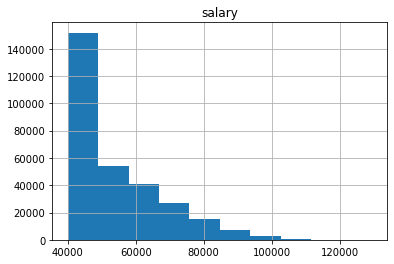

In [104]:
salary_histogram_df = pd.read_sql('select * from salaries',dbConnection)
salary_histogram_df.hist('salary')

In [107]:
avg_salary_by_title_sql = 'select titles.title,round(avg(salary),2) "Average_Salary" \
from employees \
join titles on employees.emp_title_id = title_id \
join salaries on employees.emp_no = salaries.emp_no \
group by titles.title_id'

In [108]:
avg_salary_by_title_df = pd.read_sql(avg_salary_by_title_sql,dbConnection)
avg_salary_by_title_df.head()

,title,Average_Salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Senior Engineer,48506.80
3,Technique Leader,48582.90
4,Manager,51531.04


<AxesSubplot:xlabel='title'>

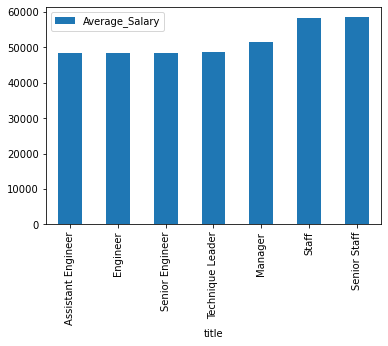

In [113]:
avg_salary_by_title_df.set_index("title").plot.bar()

In [83]:
# Close the database connectiona
dbConnection.close();
